# Assignment 4.1 [Python & R]

## University of San Diego

## ADS 502

## Dingyi Duan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

#### Python Packages

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tools.tools as stattools

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### R Package

In [4]:
%%R
library(car)
library(C50)
library(nnet)
library(e1071)
library(caret)
library(rpart)
library(readr)
library(corrplot)
library(rpart.plot)
library(randomForest)
library(NeuralNetTools)

R[write to console]: Loading required package: carData

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: ggplot2

R[write to console]: corrplot 0.90 loaded

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: 'randomForest'


R[write to console]: The following object is masked from 'package:ggplot2':

    margin




#### 20. Consider the XOR problem where there are four training points: (1, 1, −), (1, 0, +), (0, 1, +), (0, 0, −). Transform the data into the following feature space: φ=(1, 2x1, 2x2, 2x1x2, x12, x22). Find the maximum margin linear decision boundary in the transformed space.

In [5]:
# This will be done using R

In [6]:
%%R
# Set up the matrix for four training matrix
training_pts <- data.frame(matrix(c(1,1,0,0,1,0,1,0), nrow = 4))
colnames(training_pts) <- c("factor1", "factor2")

In [7]:
%%R
# 6D mapping
x <- c("x1", "x2", "x3", "x4", "x5", "x6")

In [8]:
%%R
# Create a df for the map
df <- data.frame(matrix(ncol = 6, nrow = 4))
colnames(df) <- x

In [9]:
%%R
# Formulate the matrix: The hyperplane formula -> label = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + b = 0
df$x1 <- 1
df$x2 <- sqrt(2)*training_pts$factor1
df$x3 <- sqrt(2)*training_pts$factor2
df$x4 <- sqrt(2)*training_pts$factor1 * training_pts$factor2
df$x5 <- training_pts$factor1 ^ 2
df$x6 <- training_pts$factor2 ^ 2
df$label <- c(-1, 1, 1, -1)

In [10]:
%%R
# Use Support Vector Machine model
svm_model <- svm(label ~ x1 + x2 + x3 + x4 + x5 + x6, df, 
                 type='C-classification', 
                 kernal='linear', scale=F)

In [11]:
%%R
# Constant b
b <- svm_model$rho
b

[1] 0.03382507


In [12]:
%%R
# Output for coefficients w
w <- t(svm_model$coefs) %*% svm_model$SV


In [13]:
%%R
w

     x1 x2 x3       x4 x5 x6
[1,]  0  0  0 1.414214  0  0


x4 is our 4th element in the map which is x1*x2, so our maximum margin linear decision boundary is x1x2.

#### For the following exercises, work with the clothing_sales_training and clothing_sales_test data sets. Use either Python or R to solve each problem.

#### 13. Create a logistic regression model to predict whether or not a customer has a store credit card, based on whether they have a web account and the days between purchases. Obtain the summary of the model.

#### Python

In [14]:
clothing_sales_train_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/clothing_sales_training.csv")
clothing_sales_test_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/clothing_sales_test.csv")

In [15]:
clothing_sales_train_py.head()

,CC,Days,Web,Sales per Visit
0,0,333.0,0,184.230000
1,0,171.5,0,38.500000
2,0,213.0,0,150.326667
3,1,71.4,1,104.240000
4,1,145.0,0,782.080000


In [16]:
clothing_sales_test_py.head()

,CC,Days,Web,Sales per Visit
0,1,174.00,0,64.5000
1,1,87.62,0,105.7575
2,0,49.00,0,87.4400
3,0,72.50,0,60.0000
4,0,264.00,0,318.5000


In [17]:
# Seprate the predictors and response variable as X and y // Subsetting using pd.DataFrame(df[['col1','col2']])
X_train_py = pd.DataFrame(clothing_sales_train_py[['Days', 'Web']])
y_train_py = pd.DataFrame(clothing_sales_train_py[['CC']])

In [18]:
# Add a constant to the X data frame in order to include a constant term in our regression model
X_train_py = sm.add_constant(X_train_py)

In [19]:
# Run the logistic model
logreg_py = sm.Logit(y_train_py, X_train_py).fit()

Optimization terminated successfully.
         Current function value: 0.655955
         Iterations 5


In [20]:
# Summary of the model
logreg_py.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.053     
Dependent Variable: CC               AIC:              1909.5825 
Date:               2021-07-26 01:12 BIC:              1925.4226 
No. Observations:   1451             Log-Likelihood:   -951.79   
Df Model:           2                LL-Null:          -1004.9   
Df Residuals:       1448             LLR p-value:      8.3668e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4962     0.0887    5.5968   0.0000    0.3224    0.6699
Days      -0.0037     0.0004   -8.4491   0.0000   -0.0046   -0.0028
Web        1.2537     0.3307    3.7914   0.0001    0.6056    1.9018
=================================================================

"""

#### R

In [21]:
%%R
clothing_sales_train_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/clothing_sales_training.csv")
clothing_sales_test_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/clothing_sales_test.csv")

In [22]:
%%R
# Plug and play using glm() for logistric regression model
logreg_r <- glm(formula = CC ~ Days + Web,
                data = clothing_sales_train_r,
                family = binomial)

In [23]:
%%R
# View the summary of the model
summary(logreg_r)


Call:
glm(formula = CC ~ Days + Web, family = binomial, data = clothing_sales_train_r)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9035  -1.1458  -0.6078   1.0895   2.1044  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4961706  0.0886529   5.597 2.18e-08 ***
Days        -0.0037016  0.0004381  -8.449  < 2e-16 ***
Web          1.2536955  0.3306672   3.791  0.00015 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2009.9  on 1450  degrees of freedom
Residual deviance: 1903.6  on 1448  degrees of freedom
AIC: 1909.6

Number of Fisher Scoring iterations: 4



#### 14. Are there any variables that should be removed from the model? If so, remove them and rerun the model.

#### Python

In [24]:
logreg_py.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.053     
Dependent Variable: CC               AIC:              1909.5825 
Date:               2021-07-26 01:12 BIC:              1925.4226 
No. Observations:   1451             Log-Likelihood:   -951.79   
Df Model:           2                LL-Null:          -1004.9   
Df Residuals:       1448             LLR p-value:      8.3668e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4962     0.0887    5.5968   0.0000    0.3224    0.6699
Days      -0.0037     0.0004   -8.4491   0.0000   -0.0046   -0.0028
Web        1.2537     0.3307    3.7914   0.0001    0.6056    1.9018
=================================================================

"""

We can see the p-values are all below 0.05, so that's good. Then we check for multicollinearity.

In [25]:
# Use VIF values to check for multicollinearity
vif_X = clothing_sales_train_py[['Days', 'Web']]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_X.columns


In [26]:
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i)
                          for i in range(len(vif_X.columns))]

In [27]:
vif_data

,feature,VIF
0,Days,1.010184
1,Web,1.010184


#### Low VIF values, not highly correlated. Keep both attributes.

#### R

In [28]:
%%R
summary(logreg_r)


Call:
glm(formula = CC ~ Days + Web, family = binomial, data = clothing_sales_train_r)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9035  -1.1458  -0.6078   1.0895   2.1044  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4961706  0.0886529   5.597 2.18e-08 ***
Days        -0.0037016  0.0004381  -8.449  < 2e-16 ***
Web          1.2536955  0.3306672   3.791  0.00015 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2009.9  on 1450  degrees of freedom
Residual deviance: 1903.6  on 1448  degrees of freedom
AIC: 1909.6

Number of Fisher Scoring iterations: 4



We can see the p-values are all below 0.05, so that's good. Then we check for multicollinearity.

In [29]:
%%R
vif(logreg_r)

    Days      Web 
1.001107 1.001107 


#### Low VIF values, not highly correlated. Keep both attributes.

#### 15. Write the descriptive form of the logistic regression model using the coefficients obtained from Question 1.

#### Python

y = (exp(0.4962 - 0.0037*Days + 1.2537*Web )) / (1 + exp(0.4962 - 0.0037*Days + 1.2537*Web))

#### R

y = (exp(0.4962 - 0.0037*Days + 1.2537*Web )) / (1 + exp(0.4962 - 0.0037*Days + 1.2537*Web))

#### 16. Validate the model using the test data set.

#### Python

In [30]:
# Repeat the steps using test set
X_test_py = pd.DataFrame(clothing_sales_test_py[['Days', 'Web']])
y_test_py = pd.DataFrame(clothing_sales_test_py[['CC']])
X_test_py = sm.add_constant(X_test_py)

In [31]:
logreg_test_py = sm.Logit(y_test_py, X_test_py).fit()
logreg_test_py.summary2()

Optimization terminated successfully.
         Current function value: 0.656885
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.052     
Dependent Variable: CC               AIC:              1838.7104 
Date:               2021-07-26 01:12 BIC:              1854.4324 
No. Observations:   1395             Log-Likelihood:   -916.36   
Df Model:           2                LL-Null:          -966.40   
Df Residuals:       1392             LLR p-value:      1.8534e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4634     0.0873    5.3105   0.0000    0.2924    0.6345
Days      -0.0035     0.0004   -8.2261   0.0000   -0.0043   -0.0026
Web        1.0973     0.2830    3.8780   0.0001    0.5427    1.6519
=================================================================

"""

#### R

In [32]:
%%R
# Repeat the steps using test set
logreg_test_r <- glm(formula = CC ~ Days + Web,
                data = clothing_sales_test_r,
                family = binomial)
summary(logreg_test_r)


Call:
glm(formula = CC ~ Days + Web, family = binomial, data = clothing_sales_test_r)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8458  -1.1588  -0.5775   1.1022   2.0513  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4634478  0.0872706   5.310 1.09e-07 ***
Days        -0.0034721  0.0004221  -8.226  < 2e-16 ***
Web          1.0972994  0.2829570   3.878 0.000105 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1932.8  on 1394  degrees of freedom
Residual deviance: 1832.7  on 1392  degrees of freedom
AIC: 1838.7

Number of Fisher Scoring iterations: 4



#### 17. Obtain the predicted values of the response variable for each record in the data set.

#### Python

In [33]:
# Predictions are probabilities using test data. If probability > 0.5, the instance is considered the positive class. 
predictions_prob_py = logreg_test_py.predict(X_test_py)

In [34]:
predictions_prob_py

0       0.464884
1       0.539722
2       0.572808
3       0.552734
4       0.388604
          ...   
1390    0.535372
1391    0.570546
1392    0.464021
1393    0.540903
1394    0.548008
Length: 1395, dtype: float64

In [35]:
# Convert prediction probabilities of >0.5 as for positive cases
predictions_py = (logreg_test_py.predict(X_test_py) > 0.5).astype(int)
predictions_py

0       0
1       1
2       1
3       1
4       0
       ..
1390    1
1391    1
1392    0
1393    1
1394    1
Length: 1395, dtype: int32

In [36]:
# Confusion Matrix
confusion_matrix(y_test_py, predictions_py)

array([[410, 307],
       [217, 461]], dtype=int64)

#### R

In [37]:
%%R
clothing_sales_test_r$predictions_prob <- predict(object = logreg_r, newdata = clothing_sales_test_r, type='response')

In [38]:
%%R
clothing_sales_test_r$predictions_prob

   [1] 0.4630895 0.5428533 0.5780543 0.5567058 0.3820027 0.5708153 0.5620339
   [8] 0.7991159 0.5933228 0.5425042 0.2251005 0.3776430 0.3165261 0.5560206
  [15] 0.5779099 0.5535062 0.8128358 0.5440381 0.5402065 0.1570451 0.5254650
  [22] 0.5805803 0.1248921 0.5217717 0.5180760 0.4963369 0.5849634 0.3759046
  [29] 0.2991773 0.5975138 0.5812561 0.4058585 0.5423572 0.5420448 0.4957817
  [36] 0.5286944 0.5489278 0.5512181 0.5179281 0.5480111 0.5737147 0.4557352
  [43] 0.8230801 0.5977808 0.6024798 0.1106758 0.5139159 0.3145275 0.5825620
  [50] 0.5747012 0.4262596 0.5305387 0.4989280 0.6057642 0.4289608 0.6127433
  [57] 0.5682107 0.2187095 0.5171517 0.3137300 0.8280954 0.5854756 0.4206669
  [64] 0.1092268 0.5546312 0.4640100 0.4981876 0.5756057 0.4450516 0.5065159
  [71] 0.4940236 0.7891381 0.5406662 0.5046653 0.5799942 0.5614963 0.5194621
  [78] 0.6000038 0.4952265 0.5422010 0.5516759 0.5015839 0.5222335 0.3599807
  [85] 0.3519193 0.4720741 0.3785134 0.1915801 0.4806147 0.5425042 0.5000384

 [743] 0.3229670 0.5562490 0.5174660 0.4907854 0.5009638 0.6020453 0.5525913
 [750] 0.4849312 0.1128808 0.5955359 0.6022227 0.3925426 0.5826970 0.5285099
 [757] 0.5443411 0.3578514 0.3133316 0.5832819 0.5840285 0.5469840 0.3335775
 [764] 0.1099492 0.5730356 0.4338003 0.2464317 0.3046383 0.6073101 0.5892526
 [771] 0.5330733 0.5413556 0.4727660 0.5931977 0.5818867 0.3352253 0.3468707
 [778] 0.2396224 0.4991130 0.4796907 0.7744289 0.5743121 0.4948564 0.1155016
 [785] 0.3062088 0.4499296 0.1371045 0.5369869 0.4166129 0.5794802 0.5325204
 [792] 0.4718434 0.3502327 0.4981876 0.3655426 0.3625432 0.3502327 0.5442125
 [799] 0.4157135 0.1555806 0.3595544 0.5562490 0.5479011 0.5529024 0.4040746
 [806] 0.5104477 0.7789231 0.5296167 0.3352253 0.5967658 0.5712687 0.3093634
 [813] 0.5815444 0.5176138 0.4981876 0.5818416 0.4416990 0.4711516 0.4898604
 [820] 0.5213098 0.5081350 0.5436891 0.2450595 0.6132438 0.5962223 0.1479575
 [827] 0.5641558 0.8285112 0.6041010 0.3229670 0.2099834 0.4995757 0.4298678

In [39]:
%%R
# Convert prediction probabilities of >0.5 as for positive cases
clothing_sales_test_r$predictions <- (clothing_sales_test_r$predictions_prob > 0.5)*1

In [40]:
%%R
clothing_sales_test_r$predictions

   [1] 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1
  [38] 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1
  [75] 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0
 [112] 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 [149] 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 [186] 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 [223] 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0
 [260] 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 [297] 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 [334] 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 [371] 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0
 [408] 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 [445] 0 0 0 0 0 1 1 1 0 0 1

In [41]:
%%R
# Confusion Matrix
clothing_sales_test_r[c('CC', 'predictions')] <- lapply(clothing_sales_test_r[c('CC', 'predictions')], as.factor)
confusionMatrix(clothing_sales_test_r$predictions, clothing_sales_test_r$CC, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 405 215
         1 312 463
                                          
               Accuracy : 0.6222          
                 95% CI : (0.5962, 0.6477)
    No Information Rate : 0.514           
    P-Value [Acc > NIR] : 2.532e-16       
                                          
                  Kappa : 0.2468          
                                          
 Mcnemar's Test P-Value : 2.892e-05       
                                          
            Sensitivity : 0.6829          
            Specificity : 0.5649          
         Pos Pred Value : 0.5974          
         Neg Pred Value : 0.6532          
             Prevalence : 0.4860          
         Detection Rate : 0.3319          
   Detection Prevalence : 0.5556          
      Balanced Accuracy : 0.6239          
                                          
       'Positive' Class : 1               
                              

#### For the following exercises, work with the bank_marketing_training and the bank_ marketing_test data set. Use either Python or R to solve each problem.

#### 24. Prepare the data set for neural network modeling, including standardizing the variables.

#### R

In [42]:
%%R
bank_marketing_train_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/bank_marketing_training")
bank_marketing_test_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/bank_marketing_test")

In [43]:
%%R
# Check for null
sum(is.na(bank_marketing_train_r))

[1] 0


In [44]:
%%R
head(bank_marketing_train_r)

  age         job  marital   education default housing loan   contact month
1  56   housemaid  married    basic.4y      no      no   no telephone   may
2  57    services  married high.school unknown      no   no telephone   may
3  41 blue-collar  married     unknown unknown      no   no telephone   may
4  25    services   single high.school      no     yes   no telephone   may
5  29 blue-collar   single high.school      no      no  yes telephone   may
6  57   housemaid divorced    basic.4y      no     yes   no telephone   may
  day_of_week duration campaign days_since_previous previous previous_outcome
1         mon      261        1                 999        0      nonexistent
2         mon      149        1                 999        0      nonexistent
3         mon      217        1                 999        0      nonexistent
4         mon      222        1                 999        0      nonexistent
5         mon      137        1                 999        0      nonexistent


In [45]:
%%R
# Extract numeric columns
bank_train_num_r <- bank_marketing_train_r[ c('age', 'duration', 'campaign', 
                                                'days_since_previous', 'previous', 'emp.var.rate',
                                               'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                                               'nr.employed')]
head(bank_train_num_r)

  age duration campaign days_since_previous previous emp.var.rate
1  56      261        1                 999        0          1.1
2  57      149        1                 999        0          1.1
3  41      217        1                 999        0          1.1
4  25      222        1                 999        0          1.1
5  29      137        1                 999        0          1.1
6  57      293        1                 999        0          1.1
  cons.price.idx cons.conf.idx euribor3m nr.employed
1         93.994         -36.4     4.857        5191
2         93.994         -36.4     4.857        5191
3         93.994         -36.4     4.857        5191
4         93.994         -36.4     4.857        5191
5         93.994         -36.4     4.857        5191
6         93.994         -36.4     4.857        5191


In [46]:
%%R
# Extract categorical columns
bank_train_cat_r <- bank_marketing_train_r[ , c('job', 'marital', 'education', 'default', 
                                                'housing', 'loan', 'contact','month', 'day_of_week', 
                                                'previous_outcome','response')]
head(bank_train_cat_r)

          job  marital   education default housing loan   contact month
1   housemaid  married    basic.4y      no      no   no telephone   may
2    services  married high.school unknown      no   no telephone   may
3 blue-collar  married     unknown unknown      no   no telephone   may
4    services   single high.school      no     yes   no telephone   may
5 blue-collar   single high.school      no      no  yes telephone   may
6   housemaid divorced    basic.4y      no     yes   no telephone   may
  day_of_week previous_outcome response
1         mon      nonexistent       no
2         mon      nonexistent       no
3         mon      nonexistent       no
4         mon      nonexistent       no
5         mon      nonexistent       no
6         mon      nonexistent       no


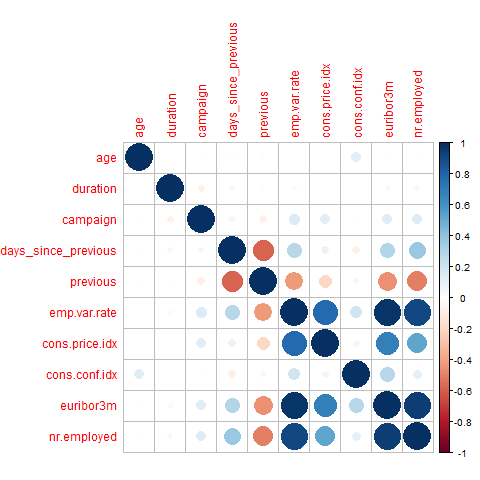

In [47]:
%%R
# Check for multicollinearity in numeric features using corrplot
corrplot(cor(bank_train_num_r), method="circle")

In [48]:
%%R
# Correlation coefficients
round(cor(bank_train_num_r),2)

                      age duration campaign days_since_previous previous
age                  1.00     0.00     0.01               -0.02     0.02
duration             0.00     1.00    -0.07               -0.04     0.02
campaign             0.01    -0.07     1.00                0.05    -0.08
days_since_previous -0.02    -0.04     0.05                1.00    -0.58
previous             0.02     0.02    -0.08               -0.58     1.00
emp.var.rate         0.00    -0.03     0.15                0.27    -0.42
cons.price.idx       0.00     0.00     0.13                0.08    -0.21
cons.conf.idx        0.13     0.00    -0.02               -0.09    -0.05
euribor3m            0.01    -0.03     0.13                0.30    -0.45
nr.employed         -0.01    -0.04     0.14                0.37    -0.50
                    emp.var.rate cons.price.idx cons.conf.idx euribor3m
age                         0.00           0.00          0.13      0.01
duration                   -0.03           0.00      

For corrlation greater than 0.7, consider multicollinearity

In [49]:
%%R
# Remove cons.price.idx, emp.var.rate, euribor3m, nr.employed
bank_train_num_r[ ,c('cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed')] <- list(NULL)
head(bank_train_num_r)

  age duration campaign days_since_previous previous cons.conf.idx
1  56      261        1                 999        0         -36.4
2  57      149        1                 999        0         -36.4
3  41      217        1                 999        0         -36.4
4  25      222        1                 999        0         -36.4
5  29      137        1                 999        0         -36.4
6  57      293        1                 999        0         -36.4


In [50]:
%%R
# Standardize the numerical attributes
bank_train_num_r$age.mm <- (bank_train_num_r$age - min(bank_train_num_r$age)) / 
(max(bank_train_num_r$age) - min(bank_train_num_r$age))
bank_train_num_r$duration.mm  <- (bank_train_num_r$duration  - min(bank_train_num_r$duration )) / 
(max(bank_train_num_r$duration) - min(bank_train_num_r$duration))
bank_train_num_r$campaign.mm  <- (bank_train_num_r$campaign  - min(bank_train_num_r$campaign)) / 
(max(bank_train_num_r$campaign) - min(bank_train_num_r$campaign))
bank_train_num_r$days_since_previous.mm <- (bank_train_num_r$days_since_previous - min(bank_train_num_r$days_since_previous)) / 
(max(bank_train_num_r$days_since_previous) - min(bank_train_num_r$days_since_previous))
bank_train_num_r$previous.mm <- (bank_train_num_r$previous - min(bank_train_num_r$previous)) / 
(max(bank_train_num_r$previous) - min(bank_train_num_r$previous))
bank_train_num_r$cons.conf.idx.mm <- (bank_train_num_r$cons.conf.idx - min(bank_train_num_r$cons.conf.idx)) / 
(max(bank_train_num_r$cons.conf.idx) - min(bank_train_num_r$cons.conf.idx))
head(bank_train_num_r)

  age duration campaign days_since_previous previous cons.conf.idx    age.mm
1  56      261        1                 999        0         -36.4 0.5270270
2  57      149        1                 999        0         -36.4 0.5405405
3  41      217        1                 999        0         -36.4 0.3243243
4  25      222        1                 999        0         -36.4 0.1081081
5  29      137        1                 999        0         -36.4 0.1621622
6  57      293        1                 999        0         -36.4 0.5405405
  duration.mm campaign.mm days_since_previous.mm previous.mm cons.conf.idx.mm
1  0.05307035           0                      1           0        0.6025105
2  0.03029687           0                      1           0        0.6025105
3  0.04412363           0                      1           0        0.6025105
4  0.04514030           0                      1           0        0.6025105
5  0.02785685           0                      1           0        0.6

In [51]:
%%R
# Change categorical data to factors for the model
bank_train_cat_r$job <- factor(bank_train_cat_r$job)
bank_train_cat_r$marital <- factor(bank_train_cat_r$marital)
bank_train_cat_r$education <- factor(bank_train_cat_r$education)
bank_train_cat_r$default <- factor(bank_train_cat_r$default)
bank_train_cat_r$housing <- factor(bank_train_cat_r$housing)
bank_train_cat_r$loan <- factor(bank_train_cat_r$loan)
bank_train_cat_r$contact <- factor(bank_train_cat_r$contact)
bank_train_cat_r$month <- factor(bank_train_cat_r$month)
bank_train_cat_r$day_of_week <- factor(bank_train_cat_r$day_of_week)
bank_train_cat_r$previous_outcome <- factor(bank_train_cat_r$previous_outcome)
bank_train_cat_r$response <- factor(bank_train_cat_r$response)

In [52]:
%%R
# Change type of the categorical variables to factors to numbers to check for multicollinearity
bank_train_cat_num_r <- subset (bank_train_cat_r, select = -response)
bank_train_cat_num_r$job <- as.numeric(factor(bank_train_cat_r$job))
bank_train_cat_num_r$marital <- as.numeric(factor(bank_train_cat_r$marital))
bank_train_cat_num_r$education <- as.numeric(factor(bank_train_cat_r$education))
bank_train_cat_num_r$default <- as.numeric(factor(bank_train_cat_r$default))
bank_train_cat_num_r$housing <- as.numeric(factor(bank_train_cat_r$housing))
bank_train_cat_num_r$loan <- as.numeric(factor(bank_train_cat_r$loan))
bank_train_cat_num_r$contact <- as.numeric(factor(bank_train_cat_r$contact))
bank_train_cat_num_r$month <- as.numeric(factor(bank_train_cat_r$month))
bank_train_cat_num_r$day_of_week <- as.numeric(factor(bank_train_cat_r$day_of_week))
bank_train_cat_num_r$previous_outcome <- as.numeric(factor(bank_train_cat_r$previous_outcome))

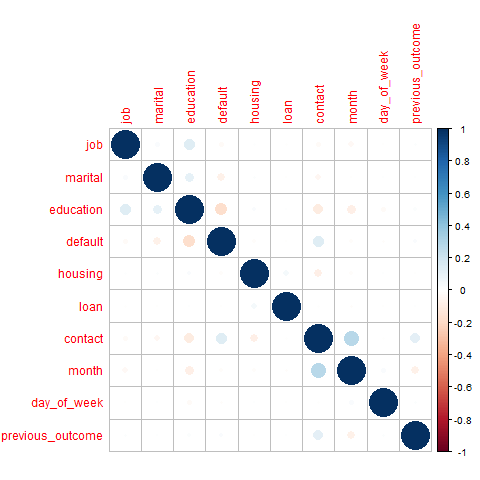

In [53]:
%%R
# Check for multicollinearity in categorical features using corrplot
corrplot(cor(bank_train_cat_num_r), method="circle")

In [54]:
%%R
# Check correlation coefficients
cor(bank_train_cat_num_r)

                          job       marital    education       default
job               1.000000000  0.0281238530  0.136793828 -0.0286272440
marital           0.028123853  1.0000000000  0.106222323 -0.0762771113
education         0.136793828  0.1062223228  1.000000000 -0.1798668381
default          -0.028627244 -0.0762771113 -0.179866838  1.0000000000
housing           0.009582003  0.0135293479  0.020243286 -0.0155394016
loan             -0.009139961 -0.0021552953  0.004254739 -0.0004944247
contact          -0.026676616 -0.0469451279 -0.106988674  0.1370650180
month            -0.037696891 -0.0071016985 -0.086758570 -0.0147433177
day_of_week      -0.001750037  0.0008636259 -0.025153700 -0.0135207274
previous_outcome  0.011166753  0.0060754395  0.016550309  0.0229150769
                      housing          loan      contact        month
job               0.009582003 -0.0091399611 -0.026676616 -0.037696891
marital           0.013529348 -0.0021552953 -0.046945128 -0.007101698
education

Categorical features are not highly correlated.

In [55]:
%%R
# Reassemble the original dataframe
bank_marketing_train_r <- data.frame(bank_train_num_r,bank_train_cat_r)
head(bank_marketing_train_r)

  age duration campaign days_since_previous previous cons.conf.idx    age.mm
1  56      261        1                 999        0         -36.4 0.5270270
2  57      149        1                 999        0         -36.4 0.5405405
3  41      217        1                 999        0         -36.4 0.3243243
4  25      222        1                 999        0         -36.4 0.1081081
5  29      137        1                 999        0         -36.4 0.1621622
6  57      293        1                 999        0         -36.4 0.5405405
  duration.mm campaign.mm days_since_previous.mm previous.mm cons.conf.idx.mm
1  0.05307035           0                      1           0        0.6025105
2  0.03029687           0                      1           0        0.6025105
3  0.04412363           0                      1           0        0.6025105
4  0.04514030           0                      1           0        0.6025105
5  0.02785685           0                      1           0        0.6

In [56]:
%%R
# Run the neural network algorithm
nnet_r <- nnet(response ~ age.mm + duration.mm + campaign.mm + days_since_previous.mm + previous.mm + cons.conf.idx.mm + job + marital +
               education + default + housing + loan + contact + month + day_of_week + previous_outcome,
               data = bank_marketing_train_r,
               size = 16) # number of nodes in the hidden layer

# weights:  817
initial  value 33164.520898 
iter  10 value 7732.490731
iter  20 value 6024.311311
iter  30 value 5533.244940
iter  40 value 5256.491055
iter  50 value 5038.648672
iter  60 value 4896.573216
iter  70 value 4749.423838
iter  80 value 4592.642818
iter  90 value 4504.226243
iter 100 value 4428.517336
final  value 4428.517336 
stopped after 100 iterations


In [57]:
%%R
# Make predictions
bank_marketing_train_r$pred <- predict(object = nnet_r, newdata = bank_marketing_train_r, type = 'class')
bank_marketing_train_r$pred

    [1] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [13] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
   [25] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [37] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
   [49] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [61] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [73] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [85] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
   [97] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [109] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [121] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [133] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
  [145] "no"  "no"  "no"  "no"  "no"  "n

 [1225] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1237] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1249] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1261] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1273] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1285] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1297] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1309] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1321] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1333] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1345] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
 [1357] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [1369] "no"  "no"  "no"  "no"  "no"  "n

 [2449] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2461] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2473] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2485] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2497] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2509] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 
 [2521] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2533] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2545] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [2557] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
 [2569] "no"  "no"  "no" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4465] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4477] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4489] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4501] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
 [4513] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4525] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4537] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4549] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4561] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4573] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4585] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [4597] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no

 [5677] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5689] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5701] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no" 
 [5713] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5725] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5737] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5749] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5761] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
 [5773] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5785] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5797] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5809] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [5821] "no"  "no"  "no"  "no"  "yes" "n

 [6901] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6913] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6925] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6937] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6949] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6961] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6973] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6985] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [6997] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [7009] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [7021] "no"  "no"  "no"  "no"  "no"  "no" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "no"  "no"  "no"  "no"  "no" 
 [8929] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [8941] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [8953] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [8965] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [8977] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
 [8989] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
 [9001] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [9013] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [9025] "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [9037] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
 [9049] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [9061] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [9073] "

[10153] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10165] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10177] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10189] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10201] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10213] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10225] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10237] "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10249] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10261] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10273] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10285] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[10297] "no"  "no"  "no"  "no"  "no"  "n

[11377] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11389] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11401] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11413] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11425] "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11437] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11449] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[11461] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[11473] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 
[11485] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13333] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "no" 
[13345] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13357] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13369] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13381] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13393] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13405] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13417] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13429] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[13441] "yes" "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no"  "yes" "no" 
[13453] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[13465] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "ye

[14545] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
[14557] "no"  "yes" "yes" "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 
[14569] "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[14581] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[14593] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[14605] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[14617] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no" 
[14629] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[14641] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 
[14653] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[14665] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[14677] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[14689] "no"  "no"  "yes" "no"  "no"  "n

[15769] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
[15781] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15793] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15805] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15817] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15829] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15841] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15853] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15865] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15877] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[15889] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "no" 
[17677] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17689] "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no" 
[17701] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17713] "no"  "no"  "yes" "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17725] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17737] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17749] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no" 
[17761] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no"  "yes"
[17773] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17785] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no" 
[17797] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17809] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[17821] "no"  "no"  "no"  "no"  "

[18901] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18913] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18925] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18937] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18949] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
[18961] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18973] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[18985] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[18997] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[19009] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no" 
[19021] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[19033] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[19045] "no"  "no"  "no"  "no"  "no"  "n

[20125] "no"  "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[20137] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[20149] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[20161] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[20173] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[20185] "no"  "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "yes"
[20197] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[20209] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[20221] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[20233] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[20245] "no" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[22105] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22117] "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22129] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22141] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22153] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22165] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22177] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22189] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22201] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22213] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[22225] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22237] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[22249] "no"  "yes" "no"  "no"  "no"  "n

[23329] "no"  "no"  "no"  "yes" "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no" 
[23341] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23353] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23365] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23377] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23389] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23401] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23413] "no"  "no"  "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[23425] "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[23437] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
[23449] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[23461] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[23473] "no"  "no"  "no"  "no"  "no"  "n

[24553] "no"  "yes" "yes" "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "yes"
[24565] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[24577] "no"  "no"  "yes" "yes" "no"  "yes" "no"  "yes" "no"  "no"  "no"  "no" 
[24589] "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[24601] "no"  "yes" "no"  "no"  "yes" "no"  "yes" "no"  "yes" "no"  "yes" "no" 
[24613] "no"  "no"  "yes" "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "no" 
[24625] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "yes" "no" 
[24637] "no"  "yes" "yes" "no"  "no"  "yes" "no"  "yes" "no"  "no"  "yes" "yes" "yes" "yes"
[25489] "no"  "yes" "no"  "no"  "yes" "yes" "yes" "yes" "yes" "no"  "yes" "no" 
[25501] "no"  "yes" "yes" "no"  "yes" "yes" "yes" "yes" "no"  "yes" "no"  "yes"
[25513] "yes"

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### 26. Plot the neural network.

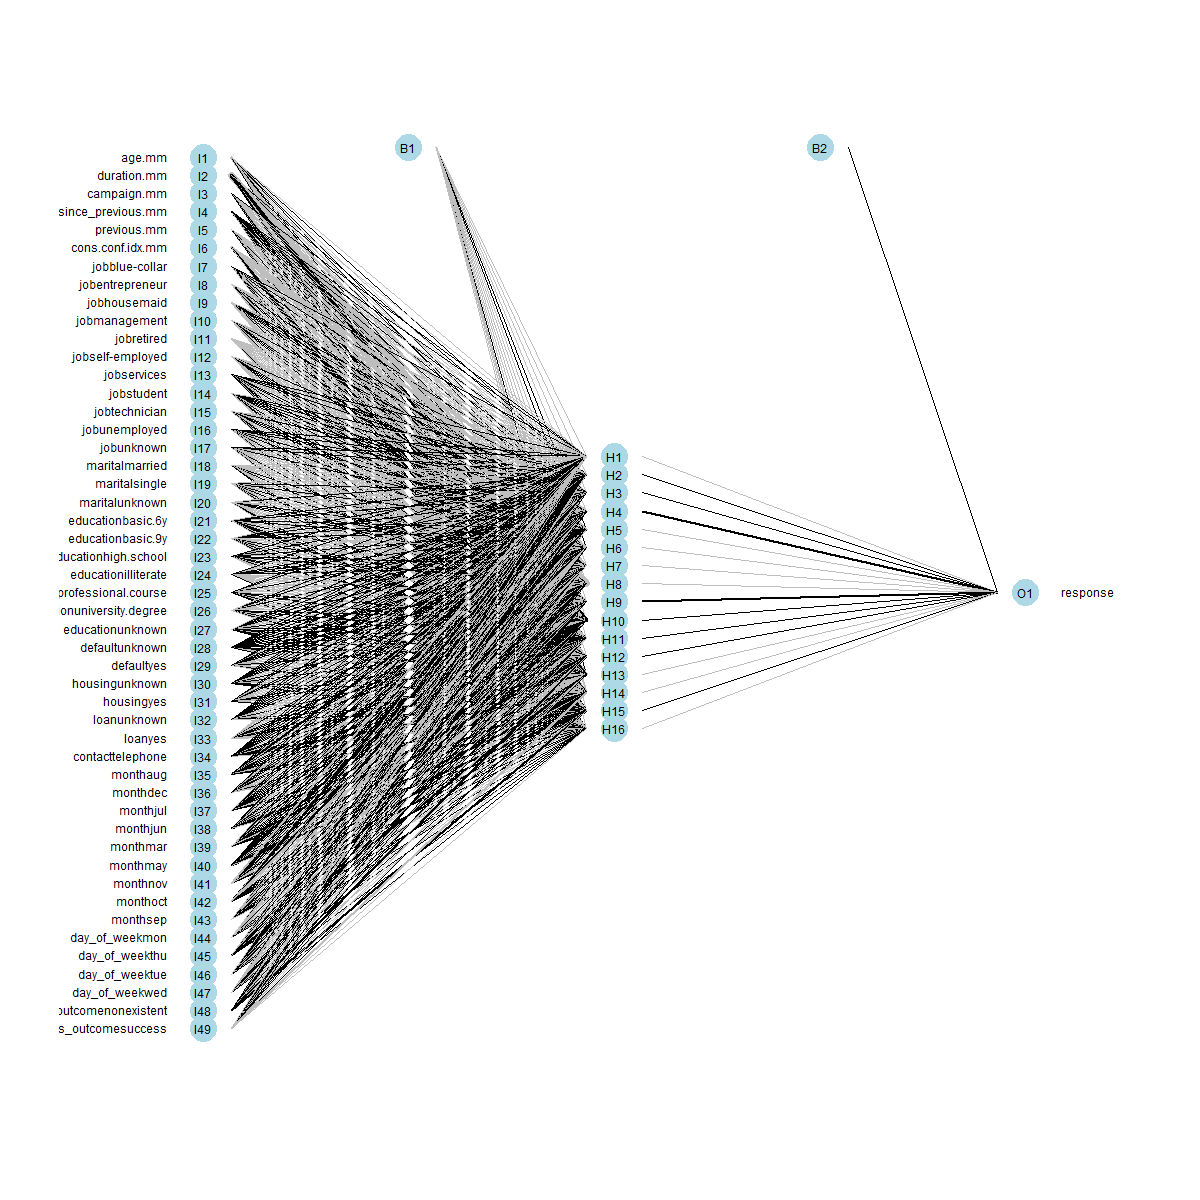

In [58]:
%%R -w 1200 -h 1200

plotnet(nnet_r)

#### 27. Evaluate the neural network model using the test data set. Construct a contingency table to compare the actual and predicted values of Response.

In [59]:
%%R
# Remove the same variables from test set
bank_marketing_test_r[ ,c('cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed')] <- list(NULL)

In [60]:
%%R
# Standardize the numerical attributes
bank_marketing_test_r$age.mm <- (bank_marketing_test_r$age - min(bank_marketing_test_r$age)) / 
(max(bank_marketing_test_r$age) - min(bank_marketing_test_r$age))
bank_marketing_test_r$duration.mm  <- (bank_marketing_test_r$duration  - min(bank_marketing_test_r$duration )) / 
(max(bank_marketing_test_r$duration) - min(bank_marketing_test_r$duration))
bank_marketing_test_r$campaign.mm  <- (bank_marketing_test_r$campaign  - min(bank_marketing_test_r$campaign)) / 
(max(bank_marketing_test_r$campaign) - min(bank_marketing_test_r$campaign))
bank_marketing_test_r$days_since_previous.mm <- (bank_marketing_test_r$days_since_previous - min(bank_marketing_test_r$days_since_previous)) / 
(max(bank_marketing_test_r$days_since_previous) - min(bank_marketing_test_r$days_since_previous))
bank_marketing_test_r$previous.mm <- (bank_marketing_test_r$previous - min(bank_marketing_test_r$previous)) / 
(max(bank_marketing_test_r$previous) - min(bank_marketing_test_r$previous))
bank_marketing_test_r$cons.conf.idx.mm <- (bank_marketing_test_r$cons.conf.idx - min(bank_marketing_test_r$cons.conf.idx)) / 
(max(bank_marketing_test_r$cons.conf.idx) - min(bank_marketing_test_r$cons.conf.idx))

In [61]:
%%R
# Convert the categorical data to factors
bank_marketing_test_r$job <- factor(bank_marketing_test_r$job)
bank_marketing_test_r$marital <- factor(bank_marketing_test_r$marital)
bank_marketing_test_r$education <- factor(bank_marketing_test_r$education)
bank_marketing_test_r$default <- factor(bank_marketing_test_r$default)
bank_marketing_test_r$housing <- factor(bank_marketing_test_r$housing)
bank_marketing_test_r$loan <- factor(bank_marketing_test_r$loan)
bank_marketing_test_r$contact <- factor(bank_marketing_test_r$contact)
bank_marketing_test_r$month <- factor(bank_marketing_test_r$month)
bank_marketing_test_r$day_of_week <- factor(bank_marketing_test_r$day_of_week)
bank_marketing_test_r$previous_outcome <- factor(bank_marketing_test_r$previous_outcome)
bank_marketing_test_r$response <- factor(bank_marketing_test_r$response)

In [62]:
%%R
nnet02_r <- nnet(response ~ age.mm + duration.mm + campaign.mm + days_since_previous.mm + previous.mm + cons.conf.idx.mm
                 + job + marital + education + default + housing + loan + contact + month + day_of_week + previous_outcome,
               data = bank_marketing_test_r,
               size = 16)

# weights:  817
initial  value 9653.438932 
iter  10 value 7225.304469
iter  20 value 5998.400409
iter  30 value 5449.601963
iter  40 value 5228.402876
iter  50 value 5081.077753
iter  60 value 4955.075944
iter  70 value 4810.081623
iter  80 value 4675.562929
iter  90 value 4579.915575
iter 100 value 4490.769405
final  value 4490.769405 
stopped after 100 iterations


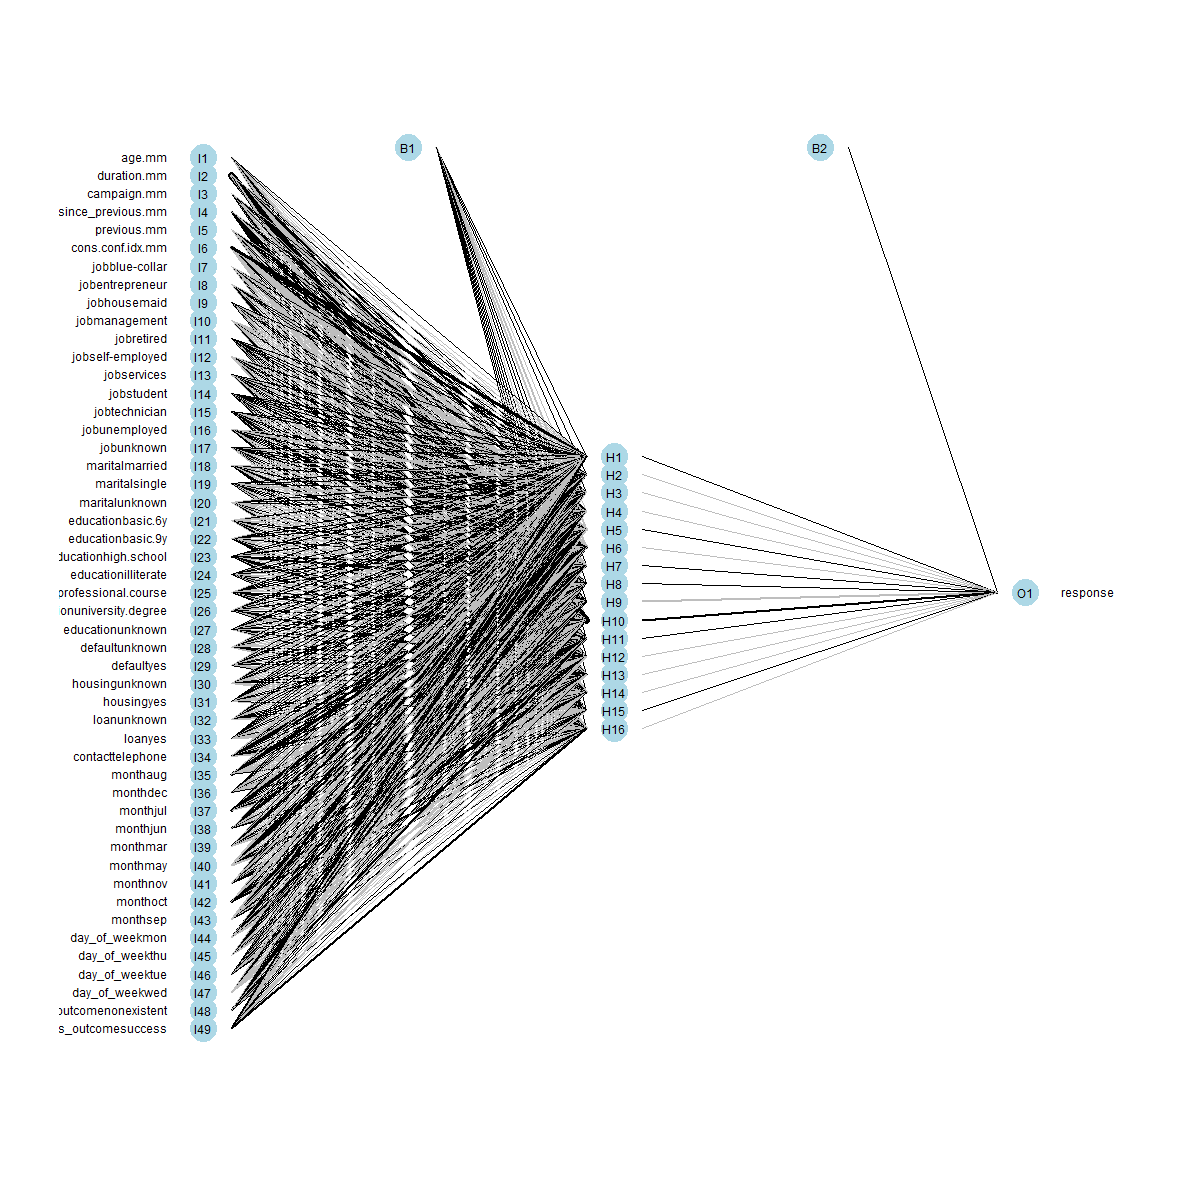

In [63]:
%%R -w 1200 -h 1200

plotnet(nnet02_r)

In [64]:
%%R
# Predictions from test set
bank_marketing_test_r$pred <- predict(object = nnet02_r, newdata = bank_marketing_test_r, type = 'class')

In [65]:
%%R
# Build a contingency table and compare the acutal response in test data set with predicted response from ANN

t1 <‐ table(bank_marketing_test_r$response, bank_marketing_test_r$pred)
row.names(t1) <‐ c("Actual: 0", "Actual: 1")
colnames(t1) <‐ c("Predicted: 0", "Predicted: 1")
t1 <‐ addmargins(A = t1, FUN = list(Total = sum), quiet = TRUE)
t1

           
            Predicted: 0 Predicted: 1 Total
  Actual: 0        23194          692 23886
  Actual: 1         1305         1683  2988
  Total            24499         2375 26874


In [66]:
%%R
TN_r = t1[1:1,1:1]
FP_r = t1[1:1,2:2]
FN_r = t1[2:2,1:1]
TP_r = t1[2:2,2:2]
cat(paste("TN:", TN_r,"\nFP:", FP_r,"\nFN:", FN_r,"\nTP:", TP_r))

TN: 23194 
FP: 692 
FN: 1305 
TP: 1683

#### 28. Which baseline model do we compare your neural network model against? Did it outperform the baseline according to accuracy?

#### We use All Negative Model since most of the responses are 'no', then we outperformed the baseline model by 3%. 

In [67]:
%%R
cat(paste("Accuracy for ANN model is: ", round((TN_r+TP_r)/(TN_r+TP_r+FN_r+FP_r),4),
          "\nAccuracy for All Negative Model is: ", round(table(bank_marketing_test_r$response)['no']/
                                                          dim(bank_marketing_test_r)[1],4)))

Accuracy for ANN model is:  0.9257 
Accuracy for All Negative Model is:  0.8888

#### 29. Using the same predictors you used for your neural network model, build models to predict Response using the following algorithms:

#### a. CART

In [68]:
%%R
cart_r <‐ rpart(formula = response ~ age.mm + duration.mm + campaign.mm + days_since_previous.mm + previous.mm + 
                cons.conf.idx.mm + job + marital + education + default + housing + loan + contact + month + 
                day_of_week + previous_outcome, data = bank_marketing_train_r, method = "class")

#### b. C5.0

In [69]:
%%R 
c5_r <‐ C5.0(formula = response ~ age.mm + duration.mm + campaign.mm + days_since_previous.mm + previous.mm + 
                cons.conf.idx.mm + job + marital + education + default + housing + loan + contact + month + 
                day_of_week + previous_outcome, data = bank_marketing_train_r, control = C5.0Control(minCases=75))

#### c. Naïve Bayes

In [70]:
%%R
nb_r <- naiveBayes(formula = response ~ age.mm + duration.mm + campaign.mm + days_since_previous.mm + previous.mm + 
                cons.conf.idx.mm + job + marital + education + default + housing + loan + contact + month + 
                day_of_week + previous_outcome, data = bank_marketing_train_r)

#### 30. Compare the results of your neural network model with the three models from the previous exercise, according to the following criteria. Discuss in detail which model performed best and worst according to each criterion.

In [71]:
%%R
# X from test set
X_for_prediction_r <- data.frame(age.mm = bank_marketing_train_r$age.mm,
                                 duration.mm = bank_marketing_train_r$duration.mm,
                                 campaign.mm = bank_marketing_train_r$campaign.mm,
                                 days_since_previous.mm = bank_marketing_train_r$days_since_previous.mm,
                                 previous.mm = bank_marketing_train_r$previous.mm,
                                 cons.conf.idx.mm = bank_marketing_train_r$cons.conf.idx.mm,
                                 job = bank_marketing_train_r$job,
                                 marital = bank_marketing_train_r$marital,
                                 education = bank_marketing_train_r$education,
                                 default = bank_marketing_train_r$default,
                                 housing = bank_marketing_train_r$housing,
                                 loan = bank_marketing_train_r$loan,
                                 contact = bank_marketing_train_r$contact,
                                 month = bank_marketing_train_r$month,
                                 day_of_week = bank_marketing_train_r$day_of_week,
                                 previous_outcome = bank_marketing_train_r$previous_outcome)



In [72]:
%%R
# Predictions for CART, C5.0, Naïve Bayes
pred_CART <- predict(object = cart_r, newdata = X_for_prediction_r, type = "class")
pred_C50 <- predict(object = c5_r, newdata = X_for_prediction_r)
pred_NB <‐ predict(object = nb_r, newdata = bank_marketing_train_r)

In [73]:
%%R
# Build a contingency table for each model
t_CART <‐ table(bank_marketing_test_r$response, pred_CART)
row.names(t_CART) <‐ c("Actual: 0", "Actual: 1")
colnames(t_CART) <‐ c("Predicted: 0", "Predicted: 1")
t_CART <‐ addmargins(A = t_CART, FUN = list(Total = sum), quiet = TRUE)
t_CART

           pred_CART
            Predicted: 0 Predicted: 1 Total
  Actual: 0        23313          573 23886
  Actual: 1         1892         1096  2988
  Total            25205         1669 26874


In [74]:
%%R
TN_CART = t_CART[1:1,1:1]
FP_CART = t_CART[1:1,2:2]
FN_CART = t_CART[2:2,1:1]
TP_CART = t_CART[2:2,2:2]
cat(paste("TN_CART:", TN_CART,"\nFP_CART:", FP_CART,"\nFN_CART:", FN_CART,"\nTP_CART:", TP_CART))

TN_CART: 23313 
FP_CART: 573 
FN_CART: 1892 
TP_CART: 1096

In [75]:
%%R
t_C50 <‐ table(bank_marketing_test_r$response, pred_C50)
row.names(t_C50) <‐ c("Actual: 0", "Actual: 1")
colnames(t_C50) <‐ c("Predicted: 0", "Predicted: 1")
t_C50 <‐ addmargins(A = t_C50, FUN = list(Total = sum), quiet = TRUE)
t_C50

           pred_C50
            Predicted: 0 Predicted: 1 Total
  Actual: 0        23070          816 23886
  Actual: 1         1491         1497  2988
  Total            24561         2313 26874


In [76]:
%%R
TN_C50 = t_C50[1:1,1:1]
FP_C50 = t_C50[1:1,2:2]
FN_C50 = t_C50[2:2,1:1]
TP_C50 = t_C50[2:2,2:2]
cat(paste("TN_C50:", TN_C50,"\nFP_C50:", FP_C50,"\nFN_C50:", FN_C50,"\nTP_C50:", TP_C50))

TN_C50: 23070 
FP_C50: 816 
FN_C50: 1491 
TP_C50: 1497

In [77]:
%%R
t_NB <‐ table(bank_marketing_test_r$response, pred_NB)
row.names(t_NB) <‐ c("Actual: 0", "Actual: 1")
colnames(t_NB) <‐ c("Predicted: 0", "Predicted: 1")
t_NB <‐ addmargins(A = t_NB, FUN = list(Total = sum), quiet = TRUE)
t_NB

           pred_NB
            Predicted: 0 Predicted: 1 Total
  Actual: 0        22706         1180 23886
  Actual: 1         1681         1307  2988
  Total            24387         2487 26874


In [78]:
%%R
TN_NB = t_NB[1:1,1:1]
FP_NB = t_NB[1:1,2:2]
FN_NB = t_NB[2:2,1:1]
TP_NB = t_NB[2:2,2:2]
cat(paste("TN_NB:", TN_NB,"\nFP_NB:", FP_NB,"\nFN_NB:", FN_NB,"\nTP_NB:", TP_NB))

TN_NB: 22706 
FP_NB: 1180 
FN_NB: 1681 
TP_NB: 1307

#### a. Accuracy

In [79]:
%%R
cat(paste("Accuracy for CART model is: ", round((TN_CART+TP_CART)/(TN_CART+TP_CART+FN_CART+FP_CART),4),
          "\nAccuracy for C50 model is: ", round((TN_C50+TP_C50)/(TN_C50+TP_C50+FN_C50+FP_C50),4),
          "\nAccuracy for NB model is: ", round((TN_NB+TP_NB)/(TN_NB+TP_NB+FN_NB+FP_NB),4)))

Accuracy for CART model is:  0.9083 
Accuracy for C50 model is:  0.9142 
Accuracy for NB model is:  0.8935

#### b. Sensitivity

In [80]:
%%R
cat(paste("Sensitivity for CART model is: ", round(TP_CART/(TP_CART+FN_CART),4),
          "\nSensitivity for C50 model is: ", round(TP_C50/(TP_C50+FN_C50),4),
          "\nSensitivity for NB model is: ", round(TP_NB/(TP_NB+FN_NB),4)))

Sensitivity for CART model is:  0.3668 
Sensitivity for C50 model is:  0.501 
Sensitivity for NB model is:  0.4374

#### c. Specificity

In [81]:
%%R
cat(paste("Specificity for CART model is: ", round(TN_CART/(TN_CART+FP_CART),4),
          "\nSpecificity for C50 model is: ", round(TN_C50/(TN_C50+FP_C50),4),
          "\nSpecificity for NB model is: ", round(TN_NB/(TN_NB+FP_NB),4)))

Specificity for CART model is:  0.976 
Specificity for C50 model is:  0.9658 
Specificity for NB model is:  0.9506

In general, the higher the accuracy, sensitivity, specificity the better. So if we average all 3 scores, CART: 0.75, C50: 0.79, NB: 0.76, we will have C50 > NB > CART. Since we have an imbalanced data class and we use All negative model, we then focus more on the responses of 'yes' which is true positive. So the false negative will cost us more given there are rare enough positive cases and true positive is more important. Hence we'll look at sensitivity and the C50 model has the highest sensitivity score, which makes it the best model; and despite the high accuracy and specificity for CART model, it has the lowest sensitivity score so it's the worst in this case. So final order is C50 > NB > CART.

#### For Exercises 14–20, work with the adult_ch6_training and adult_ch6_test data sets. Use either Python or R to solve each problem.

#### 19. Use random forests on the training data set to predict income using marital status and capital gains and losses.

#### Python

In [82]:
adult_ch6_train_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_training")
adult_ch6_test_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_test")
adult_ch6_train_py.head()

,Marital status,Income,Cap_Gains_Losses
0,Never-married,<=50K,0.02174
1,Divorced,<=50K,0.00000
2,Married,<=50K,0.00000
3,Married,<=50K,0.00000
4,Married,<=50K,0.00000


In [83]:
# Response variable
y_train_py = adult_ch6_train_py[['Income']]

In [84]:
# Make dummies for categorical variable 'Marital status'
mar_np_py = np.array(adult_ch6_train_py['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np_py, drop=True, dictnames = True)
mar_cat_pd = pd.DataFrame(mar_cat)
X_train_py = pd.concat((adult_ch6_train_py[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [85]:
# The random forest command in Python requires a response variable formatted as a one‐dimensional array, 
# so we use numpy’s ravel() command to create that format.
rfy_py = np.ravel(y_train_py)

In [86]:
# Run the model
rf_train_py = RandomForestClassifier(n_estimators = 100,
criterion="gini").fit(X_train_py,rfy_py)

In [87]:
rf_train_py.predict(X_train_py)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

#### R

In [88]:
%%R
adult_ch6_train_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_training")
adult_ch6_test_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_test")
head(adult_ch6_train_r)

  Marital.status Income Cap_Gains_Losses
1  Never-married  <=50K          0.02174
2       Divorced  <=50K          0.00000
3        Married  <=50K          0.00000
4        Married  <=50K          0.00000
5        Married  <=50K          0.00000
6        Married   >50K          0.00000


In [89]:
%%R
# Change column to eliminate special characters
colnames(adult_ch6_train_r)[1] <‐ "maritalStatus"

In [90]:
%%R
# Convert categorical into factors
adult_ch6_train_r$Income <‐ factor(adult_ch6_train_r$Income)
adult_ch6_train_r$maritalStatus <‐ factor(adult_ch6_train_r$maritalStatus)

In [91]:
%%R
rf_train_r <‐ randomForest(formula = Income ~ maritalStatus + Cap_Gains_Losses, 
                     data = adult_ch6_train_r, ntree = 100, type = 'classification')

In [92]:
%%R
rf_train_r$predicted

    1     2     3     4     5     6     7     8     9    10    11    12    13 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   79    80    81    82    83    84    85    86    8

<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  677   678   679   680   681   682   683   684   685   686   687   688   689 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
  690   691   692   693   694   695   696   697   698   699   700   701   702 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  703   704   705   706   707   708   709   710   711   712   713   714   715 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  716   717   718   719   720   721   722   723   724   725   726   727   728 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  729   730   731   732   733   734   735   736   737   738   739   740   741 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  742   743   744   745   746   747   748   749   750   751   752   753   754 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50

 1340  1341  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 1353  1354  1355  1356  1357  1358  1359  1360  1361  1362  1363  1364  1365 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K 
 1366  1367  1368  1369  1370  1371  1372  1373  1374  1375  1376  1377  1378 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K 
 1379  1380  1381  1382  1383  1384  1385  1386  1387  1388  1389  1390  1391 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K 
 1392  1393  1394  1395 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2403  2404  2405 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
 2406  2407  2408  2409  2410  2411  2412  2413  2414  2415  2416  2417  2418 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2419  2420  2421  2422  2423  2424  2425  2426  2427  2428  2429  2430  2431 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2432  2433  2434  2435  2436  2437  2438  2439  2440  2441  2442  2443  2444 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2445  2446  2447  2448  2449  2450  2451  2452  2453  2454  2455  2456  2457 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2458  2459  2460  2461  2462  2463  2464  2465  2466  2467  2468  2469  2470 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K 
 2471  2472  2473  2474  2475  2476  2477  2478  2479  2480  2481  2482  2483 
<=50K <=50K <=50K <=50K <=50K <=5

 3069  3070  3071  3072  3073  3074  3075  3076  3077  3078  3079  3080  3081 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3082  3083  3084  3085  3086  3087  3088  3089  3090  3091  3092  3093  3094 
<=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3095  3096  3097  3098  3099  3100  3101  3102  3103  3104  3105  3106  3107 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3108  3109  3110  3111  3112  3113  3114  3115  3116  3117  3118  3119  3120 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 3121  3122  3123  3124  3125  3126  3127  3128  3129  3130  3131  3132  3133 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3134  3135  3136  3137  3138  3139  3140  3141  3142  3143  3144  3145  3146 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3147  3148  3149  3150  3151  3152  3153  3154  315

<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3745  3746  3747  3748  3749  3750  3751  3752  3753  3754  3755  3756  3757 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 3758  3759  3760  3761  3762  3763  3764  3765  3766  3767  3768  3769  3770 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K 
 3771  3772  3773  3774  3775  3776  3777  3778  3779  3780  3781  3782  3783 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3784  3785  3786  3787  3788  3789  3790  3791  3792  3793  3794  3795  3796 


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 4824  4825  4826  4827  4828  4829  4830  4831  4832  4833  4834  4835  4836 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4837  4838  4839  4840  4841  4842  4843  4844  4845  4846  4847  4848  4849 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4850  4851  4852  4853  4854  4855  4856  4857  4858  4859  4860  4861  4862 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4863  4864  4865  4866  4867  4868  4869  4870  4871  4872  4873  4874  4875 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4876  4877  4878  4879  4880  4881  4882  4883  4884  4885  4886  4887  4888 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4889  4890  4891  4892  4893  4894  4895  4896  4897  4898  4899  4900  4901 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50

 5487  5488  5489  5490  5491  5492  5493  5494  5495  5496  5497  5498  5499 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K 
 5500  5501  5502  5503  5504  5505  5506  5507  5508  5509  5510  5511  5512 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 5513  5514  5515  5516  5517  5518  5519  5520  5521  5522  5523  5524  5525 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5526  5527  5528  5529  5530  5531  5532  5533  5534  5535  5536  5537  5538 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K 
 5539  5540  5541  5542  5543  5544  5545  5546  5547  5548  5549  5550  5551 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K  >50K <=50K 
 5552  5553  5554  5555  5556  5557  5558  5559  5560  5561  5562  5563  5564 
<=50K <=50K <=50K  >50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
 5565  5566  5567  5568  5569  5570  5571  5572  557

<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 6163  6164  6165  6166  6167  6168  6169  6170  6171  6172  6173  6174  6175 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 6176  6177  6178  6179  6180  6181  6182  6183  6184  6185  6186  6187  6188 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 6189  6190  6191  6192  6193  6194  6195  6196  6197  6198  6199  6200  6201 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K 
 6202  6203  6204  6205  6206  6207  6208  6209  6210  6211  6212  6213  6214 
<=50K <=50K <=50K <=50K <=50K <=50K 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<=50K <=50K 
 7229  7230  7231  7232  7233  7234  7235  7236  7237  7238  7239  7240  7241 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 7242  7243  7244  7245  7246  7247  7248  7249  7250  7251  7252  7253  7254 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7255  7256  7257  7258  7259  7260  7261  7262  7263  7264  7265  7266  7267 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7268  7269  7270  7271  7272  7273  7274  7275  7276  7277  7278  7279  7280 
<=50K <=50K <=50K <=50K <=50K  >50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K 
 7281  7282  7283  7284  7285  7286  7287  7288  7289  7290  7291  7292  7293 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7294  7295  7296  7297  7298  7299  7300  7301  7302  7303  7304  7305  7306 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 7307  7308  7309  7310  7311  7312  73

<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7905  7906  7907  7908  7909  7910  7911  7912  7913  7914  7915  7916  7917 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7918  7919  7920  7921  7922  7923  7924  7925  7926  7927  7928  7929  7930 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7931  7932  7933  7934  7935  7936  7937  7938  7939  7940  7941  7942  7943 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 7944  7945  7946  7947  7948  7949  7950  7951  7952  7953  7954  7955  7956 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7957  7958  7959  7960  7961  7962  7963  7964  7965  7966  7967  7968  7969 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 7970  7971  7972  7973  7974  7975  7976  7977  7978  7979  7980  7981  7982 
 >50K <=50K <=50K  >50K <=50K <=50K <=50K  >50K <=50

 8568  8569  8570  8571  8572  8573  8574  8575  8576  8577  8578  8579  8580 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 8581  8582  8583  8584  8585  8586  8587  8588  8589  8590  8591  8592  8593 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 8594  8595  8596  8597  8598  8599  8600  8601  8602  8603  8604  8605  8606 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 8607  8608  8609  8610  8611  8612  8613  8614  8615  8616  8617  8618  8619 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 8620 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9445  9446  9447  9448  9449  9450  9451 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 9452  9453  9454  9455  9456  9457  9458  9459  9460  9461  9462  9463  9464 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 9465  9466  9467  9468  9469  9470  9471  9472  9473  9474  9475  9476  9477 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 9478  9479  9480  9481  9482  9483  9484  9485  9486  9487  9488  9489  9490 
 >50K <=50K  >50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 9491  9492  9493  9494  9495  9496  9497  9498  9499  9500  9501  9502  9503 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 9504  9505  9506  9507  9508  9509  9510  9511  9512  9513  9514  9515  9516 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 9517  9518  9519  9520  9521  9522  9523  9524  9525  9526  9527  9528  9529 
<=50K <=5

10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 
<=50K <=50K  >50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K  >50K 
10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K 
10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K 
10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K  >50K 
10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K 
10193 10194 10195 10196 10197 10198 10199 10200 1020

<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
10791 10792 10793 10794 10795 10796 10797 10798 10799 10800 10801 10802 10803 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
10804 10805 10806 10807 10808 10809 10810 10811 10812 10813 10814 10815 10816 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
10817 10818 10819 10820 10821 10822 10823 10824 10825 10826 10827 10828 10829 
<=50K <=50K <=50K  >50K  >50K <=50K  >50K <=50K  >50K <=50K <=50K <=50K <=50K 
10830 10831 10832 10833 10834 10835 10836 10837 10838 10839 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11690 11691 11692 11693 11694 11695 11696 11697 11698 11699 11700 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
11701 11702 11703 11704 11705 11706 11707 11708 11709 11710 11711 11712 11713 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
11714 11715 11716 11717 11718 11719 11720 11721 11722 11723 11724 11725 11726 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K 
11727 11728 11729 11730 11731 11732 11733 11734 11735 11736 11737 11738 11739 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
11740 11741 11742 11743 11744 11745 11746 11747 11748 11749 11750 11751 11752 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
11753 11754 11755 11756 11757 11758 11759 11760 11761 11762 11763 11764 11765 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
11766 11767 11768 11769 11770 11771 11772 11773 11774 11775 1177

<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
12364 12365 12366 12367 12368 12369 12370 12371 12372 12373 12374 12375 12376 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
12377 12378 12379 12380 12381 12382 12383 12384 12385 12386 12387 12388 12389 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
12390 12391 12392 12393 12394 12395 12396 12397 12398 12399 12400 12401 12402 
 >50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
12403 12404 12405 12406 12407 12408 12409 12410 12411 12412 12413 12414 12415 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
12416 12417 12418 12419 12420 12421 12422 12423 12424 12425 12426 12427 12428 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
12429 12430 12431 12432 12433 12434 12435 12436 12437 12438 12439 12440 12441 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50

13027 13028 13029 13030 13031 13032 13033 13034 13035 13036 13037 13038 13039 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
13040 13041 13042 13043 13044 13045 13046 13047 13048 13049 13050 13051 13052 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
13053 13054 13055 13056 13057 13058 13059 13060 13061 13062 13063 13064 13065 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K 
13066 13067 13068 13069 13070 13071 13072 13073 13074 13075 13076 13077 13078 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
13079 13080 13081 13082 13083 13084 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13972 13973 13974 13975 
<=50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
13976 13977 13978 13979 13980 13981 13982 13983 13984 13985 13986 13987 13988 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
13989 13990 13991 13992 13993 13994 13995 13996 13997 13998 13999 14000 14001 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14002 14003 14004 14005 14006 14007 14008 14009 14010 14011 14012 14013 14014 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K 
14015 14016 14017 14018 14019 14020 14021 14022 14023 14024 14025 14026 14027 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
14028 14029 14030 14031 14032 14033 14034 14035 14036 14037 14038 14039 14040 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14041 14042 14043 14044 14045 14046 14047 14048 14049 14050 14051 14052 14053 
<=50K <=50K <=50K <=50K <=5

14639 14640 14641 14642 14643 14644 14645 14646 14647 14648 14649 14650 14651 
<=50K  >50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
14652 14653 14654 14655 14656 14657 14658 14659 14660 14661 14662 14663 14664 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14665 14666 14667 14668 14669 14670 14671 14672 14673 14674 14675 14676 14677 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14678 14679 14680 14681 14682 14683 14684 14685 14686 14687 14688 14689 14690 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14691 14692 14693 14694 14695 14696 14697 14698 14699 14700 14701 14702 14703 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14704 14705 14706 14707 14708 14709 14710 14711 14712 14713 14714 14715 14716 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
14717 14718 14719 14720 14721 14722 14723 14724 1472

<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
15315 15316 15317 15318 15319 15320 15321 15322 15323 15324 15325 15326 15327 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
15328 15329 15330 15331 15332 15333 15334 15335 15336 15337 15338 15339 15340 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
15341 15342 15343 15344 15345 15346 15347 15348 15349 15350 15351 15352 15353 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
15354 15355 15356 15357 15358 15359 15360 15361 15362 15363 15364 15365 15366 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



16242 16243 16244 16245 16246 16247 16248 16249 16250 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16251 16252 16253 16254 16255 16256 16257 16258 16259 16260 16261 16262 16263 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16264 16265 16266 16267 16268 16269 16270 16271 16272 16273 16274 16275 16276 
<=50K <=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16277 16278 16279 16280 16281 16282 16283 16284 16285 16286 16287 16288 16289 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16290 16291 16292 16293 16294 16295 16296 16297 16298 16299 16300 16301 16302 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16303 16304 16305 16306 16307 16308 16309 16310 16311 16312 16313 16314 16315 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16316 16317 16318 16319 16320 16321 16322 16323 16324 16325 16326 16327 1632

16914 16915 16916 16917 16918 16919 16920 16921 16922 16923 16924 16925 16926 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
16927 16928 16929 16930 16931 16932 16933 16934 16935 16936 16937 16938 16939 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16940 16941 16942 16943 16944 16945 16946 16947 16948 16949 16950 16951 16952 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16953 16954 16955 16956 16957 16958 16959 16960 16961 16962 16963 16964 16965 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K 
16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
16992 16993 16994 16995 16996 16997 16998 16999 1700

<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K  >50K <=50K 
17590 17591 17592 17593 17594 17595 17596 17597 17598 17599 17600 17601 17602 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
17603 17604 17605 17606 17607 17608 17609 17610 17611 17612 17613 17614 17615 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
17616 17617 17618 17619 17620 17621 17622 17623 17624 17625 17626 17627 17628 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
17629 17630 17631 17632 17633 17634 17635 17636 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



18514 18515 18516 18517 18518 18519 18520 18521 18522 18523 18524 18525 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
18526 18527 18528 18529 18530 18531 18532 18533 18534 18535 18536 18537 18538 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
18539 18540 18541 18542 18543 18544 18545 18546 18547 18548 18549 18550 18551 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
18552 18553 18554 18555 18556 18557 18558 18559 18560 18561 18562 18563 18564 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K 
18565 18566 18567 18568 18569 18570 18571 18572 18573 18574 18575 18576 18577 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
18578 18579 18580 18581 18582 18583 18584 18585 18586 18587 18588 18589 18590 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
18591 18592 18593 18594 18595 18596 18597 18598 18599 1860

#### 20. Use random forests using the test data set that utilizes the same target and predictor variables. Does the test data result match the training data result?

#### Python

In [93]:
y_test_py = adult_ch6_test_py[['Income']]
mar_np_py = np.array(adult_ch6_test_py['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np_py, drop=True, dictnames = True)
mar_cat_pd = pd.DataFrame(mar_cat)
X_test_py = pd.concat((adult_ch6_test_py[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)
rfy_py = np.ravel(y_test_py)

In [94]:
rf_test_py = RandomForestClassifier(n_estimators = 100,
criterion="gini").fit(X_test_py,rfy_py)

In [95]:
rf_test_py.predict(X_test_py)

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [96]:
cm_train = confusion_matrix(y_train_py, rf_train_py.predict(X_train_py))
cm_test = confusion_matrix(y_test_py, rf_test_py.predict(X_test_py))

In [97]:
cm_train

array([[14237,    34],
       [ 3138,  1352]], dtype=int64)

In [98]:
cm_test

array([[4668,    6],
       [1034,  447]], dtype=int64)

In [99]:
TN_train_py = cm_train[0][0]
FP_train_py = cm_train[0][1]
FN_train_py = cm_train[1][0]
TP_train_py = cm_train[1][1]
TN_test_py = cm_test[0][0]
FP_test_py = cm_test[0][1]
FN_test_py = cm_test[1][0]
TP_test_py = cm_test[1][1]

In [100]:
print('Accuracy for training data is: ',round((TN_train_py+TP_train_py)/(TN_train_py+TP_train_py+FN_train_py+FP_train_py),4),
     '\nAccuracy for test data is: ', round((TN_test_py+TP_test_py)/(TN_test_py+TP_test_py+FN_test_py+FP_test_py),4))

Accuracy for training data is:  0.8309 
Accuracy for test data is:  0.831


In [101]:
print('Specificity for training data is: ',round(TN_train_py/(TN_train_py+FP_train_py),4),
     '\nSpecificity for test data is: ',round(TN_test_py/(TN_test_py+FP_test_py),4))

Specificity for training data is:  0.9976 
Specificity for test data is:  0.9987


In [102]:
print('Sensitivity for training data is: ', round(TP_train_py/(TP_train_py+FN_train_py),4),
     '\nSensitivity for test data is: ', round(TP_test_py/(TP_test_py+FN_test_py),4))

Sensitivity for training data is:  0.3011 
Sensitivity for test data is:  0.3018


#### The training data result matches test data result.

#### R

In [103]:
%%R
colnames(adult_ch6_test_r)[1] <‐ "maritalStatus"
adult_ch6_test_r$Income <‐ factor(adult_ch6_test_r$Income)
adult_ch6_test_r$maritalStatus <‐ factor(adult_ch6_test_r$maritalStatus)
rf_test_r <‐ randomForest(formula = Income ~ maritalStatus + Cap_Gains_Losses, 
                     data = adult_ch6_test_r, ntree = 100, type = 'classification')

In [104]:
%%R
rf_test_r$predicted

    1     2     3     4     5     6     7     8     9    10    11    12    13 
<=50K  >50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K  >50K 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K  >50K <=50K <=50K <=50K <=50K 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
 >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   79    80    81    82    83    84    85    86    8

<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  677   678   679   680   681   682   683   684   685   686   687   688   689 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  690   691   692   693   694   695   696   697   698   699   700   701   702 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K <=50K 
  703   704   705   706   707   708   709   710   711   712   713   714   715 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
  716   717   718   719   720   721   722   723   724   725   726   727   728 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
  729   730   731   732   733   734   735   736   737   738   739   740   741 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K 
  742   743   744   745   746   747   748   749   750   751   752   753   754 
<=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50

 1340  1341  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352 
<=50K <=50K  >50K <=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
 1353  1354  1355  1356  1357  1358  1359  1360  1361  1362  1363  1364  1365 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 1366  1367  1368  1369  1370  1371  1372  1373  1374  1375  1376  1377  1378 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 1379  1380  1381  1382  1383  1384  1385  1386  1387  1388  1389  1390  1391 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 1392  1393  1394  1395 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2389  2390  2391  2392 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2393  2394  2395  2396  2397  2398  2399  2400  2401  2402  2403  2404  2405 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2406  2407  2408  2409  2410  2411  2412  2413  2414  2415  2416  2417  2418 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2419  2420  2421  2422  2423  2424  2425  2426  2427  2428  2429  2430  2431 
<=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2432  2433  2434  2435  2436  2437  2438  2439  2440  2441  2442  2443  2444 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2445  2446  2447  2448  2449  2450  2451  2452  2453  2454  2455  2456  2457 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 2458  2459  2460  2461  2462  2463  2464  2465  2466  2467  2468  2469  2470 
<=50K <=50K <=50K <=50K <=5

 3056  3057  3058  3059  3060  3061  3062  3063  3064  3065  3066  3067  3068 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3069  3070  3071  3072  3073  3074  3075  3076  3077  3078  3079  3080  3081 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K 
 3082  3083  3084  3085  3086  3087  3088  3089  3090  3091  3092  3093  3094 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3095  3096  3097  3098  3099  3100  3101  3102  3103  3104  3105  3106  3107 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3108  3109  3110  3111  3112  3113  3114  3115  3116  3117  3118  3119  3120 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3121  3122  3123  3124  3125  3126  3127  3128  3129  3130  3131  3132  3133 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K 
 3134  3135  3136  3137  3138  3139  3140  3141  314

<=50K  >50K <=50K <=50K <=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K 
 3732  3733  3734  3735  3736  3737  3738  3739  3740  3741  3742  3743  3744 
<=50K <=50K  >50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 3745  3746  3747  3748  3749  3750  3751  3752  3753  3754  3755  3756  3757 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3758  3759  3760  3761  3762  3763  3764  3765  3766  3767  3768  3769  3770 
<=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 3771  3772  3773  3774  3775  3776  3777  3778  3779  3780  3781  3782  3783 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4751  4752  4753  4754  4755  4756  4757  4758 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4759  4760  4761  4762  4763  4764  4765  4766  4767  4768  4769  4770  4771 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4772  4773  4774  4775  4776  4777  4778  4779  4780  4781  4782  4783  4784 
<=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4785  4786  4787  4788  4789  4790  4791  4792  4793  4794  4795  4796  4797 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 4798  4799  4800  4801  4802  4803  4804  4805  4806  4807  4808  4809  4810 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K  >50K 
 4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821  4822  4823 
<=50K <=50K <=50K <=50K  >50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K  >50K 
 4824  4825  4826  4827  4828  4829  4830  4831  4832  4833  4834  4835  4836 
<=5

 5422  5423  5424  5425  5426  5427  5428  5429  5430  5431  5432  5433  5434 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K 
 5435  5436  5437  5438  5439  5440  5441  5442  5443  5444  5445  5446  5447 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5448  5449  5450  5451  5452  5453  5454  5455  5456  5457  5458  5459  5460 
<=50K  >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5461  5462  5463  5464  5465  5466  5467  5468  5469  5470  5471  5472  5473 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5474  5475  5476  5477  5478  5479  5480  5481  5482  5483  5484  5485  5486 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5487  5488  5489  5490  5491  5492  5493  5494  5495  5496  5497  5498  5499 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 5500  5501  5502  5503  5504  5505  5506  5507  550

 >50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K <=50K <=50K 
 6098  6099  6100  6101  6102  6103  6104  6105  6106  6107  6108  6109  6110 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 6111  6112  6113  6114  6115  6116  6117  6118  6119  6120  6121  6122  6123 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K  >50K <=50K <=50K <=50K  >50K <=50K 
 6124  6125  6126  6127  6128  6129  6130  6131  6132  6133  6134  6135  6136 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
 6137  6138  6139  6140  6141  6142  6143  6144  6145 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [105]:
%%R
t_train <‐ table(adult_ch6_train_r$Income, rf_train_r$predicted)
row.names(t_train) <‐ c("Actual: 0", "Actual: 1")
colnames(t_train) <‐ c("Predicted: 0", "Predicted: 1")
t_train <‐ addmargins(A = t_train, FUN = list(Total = sum), quiet = TRUE)

t_test <‐ table(adult_ch6_test_r$Income, rf_test_r$predicted)
row.names(t_test) <‐ c("Actual: 0", "Actual: 1")
colnames(t_test) <‐ c("Predicted: 0", "Predicted: 1")
t_test <‐ addmargins(A = t_test, FUN = list(Total = sum), quiet = TRUE)

In [106]:
%%R
t_train

           
            Predicted: 0 Predicted: 1 Total
  Actual: 0        14155          116 14271
  Actual: 1         3261         1229  4490
  Total            17416         1345 18761


In [107]:
%%R
t_test

           
            Predicted: 0 Predicted: 1 Total
  Actual: 0         4623           51  4674
  Actual: 1         1081          400  1481
  Total             5704          451  6155


In [108]:
%%R
TN_train_r = t_train[1:1,1:1]
FP_train_r = t_train[1:1,2:2]
FN_train_r = t_train[2:2,1:1]
TP_train_r = t_train[2:2,2:2]
TN_test_r = t_test[1:1,1:1]
FP_test_r = t_test[1:1,2:2]
FN_test_r = t_test[2:2,2:2]
TP_test_r = t_test[2:2,2:2]

In [109]:
%%R
cat(paste('Accuracy for training data is: ', round((TN_train_r+TP_train_r)/(TN_train_r+TP_train_r+FN_train_r+FP_train_r),4),
          '\nAccuracy for test data is: ', round((TN_test_r+TP_test_r)/(TN_test_r+TP_test_r+FN_test_r+FP_test_r),4)))

Accuracy for training data is:  0.82 
Accuracy for test data is:  0.9176

In [110]:
%%R
cat(paste('Specificity for training data is: ', round(TN_train_r/(TN_train_r+FP_train_r),4),
          '\nSpecificity for test data is: ', round(TN_test_r/(TN_test_r+FP_test_r),4)))

Specificity for training data is:  0.9919 
Specificity for test data is:  0.9891

In [111]:
%%R
cat(paste('Sensitivity for training data is: ', round(TP_train_r/(TP_train_r+FN_train_r),4),
          '\nSensitivity for test data is: ', round(TP_test_r/(TP_test_r+FN_test_r),4)))

Sensitivity for training data is:  0.2737 
Sensitivity for test data is:  0.5

#### Compare to the Python code, the Accuracy and Sensitivity don't match as good for training vs. test data result in the R code.